In [39]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_boston
from pandas_profiling import ProfileReport

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [24]:
# Dataset discription
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
bos['PRICE'] = boston.target

In [6]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Let's do some data preprocessing

In [39]:
# Checking any missing values
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
PRICE      0
dtype: int64

In [40]:
# No missing values 😊

In [41]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


In [42]:
# EDA Part

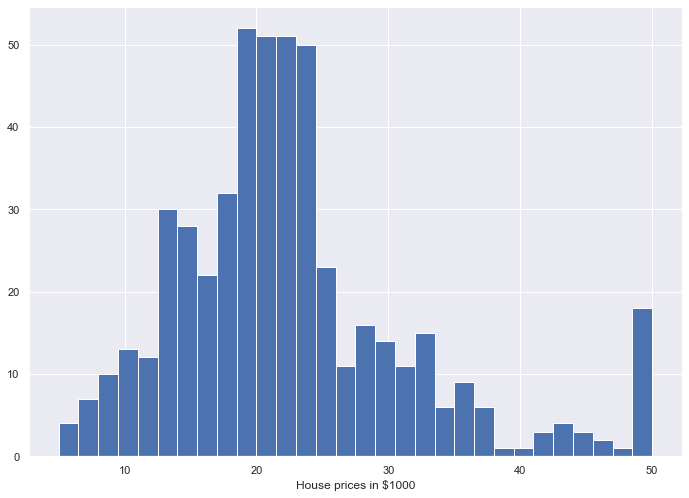

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

In [9]:
# Created a DataFrame without the price column, since we need to see the correlation between the variables

bos_1 = pd.DataFrame(boston.data,columns= boston.feature_names)

In [10]:
bos_1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


<AxesSubplot:>

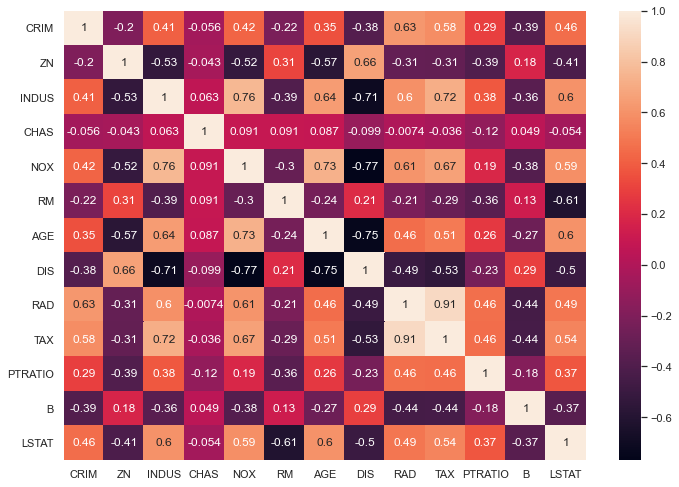

In [25]:
# Correlation between  variables
correlation_ = bos_1.corr()
sns.heatmap(data=correlation_,annot=True)

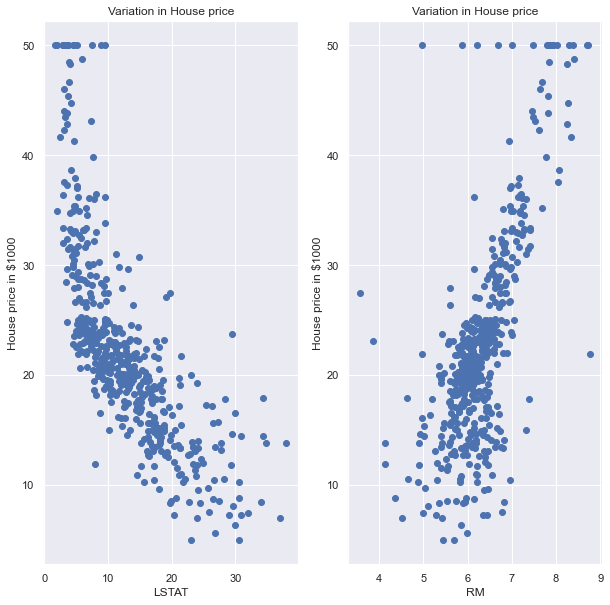

In [32]:
plt.figure(figsize=(10,10))

feature = ['LSTAT','RM']
target = bos['PRICE']

for i,col in enumerate(feature):
    plt.subplot(1,len(feature),i+1)
    x = bos[col]
    y = target
    plt.scatter(x,y)
    plt.title('Variation in House price')
    plt.xlabel(col)
    plt.ylabel("House price in $1000")

Notice -

1. The prices increase as the value of RM increases linearly. There are few outliers

2. The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

Since it is really hard to visualize with the multiple features, we will 1st predict the house price with just one variable and then move to the regression with all features.

Since we saw that ‘RM’ shows positive correlation with the House Prices we will use this variable.

In [33]:
bos.RM

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [42]:
X_rooms = bos.RM
Y_price = bos.PRICE


X_rooms = np.array(X_rooms).reshape(-1,1)
Y_price = np.array(Y_price).reshape(-1,1)

print(X_rooms.shape)
print(Y_price.shape)

(506, 1)
(506, 1)


## Splitting the data into traning and testing sets

In [43]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, Y_price, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [50]:

linear_1 = LinearRegression()
linear_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = linear_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(linear_1.score(X_train_1, Y_train_1),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43


In [54]:
# model evaluation for test set


y_pred_1 = linear_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(linear_1.score(X_test_1, Y_test_1),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.895963186952216
R^2: 0.69


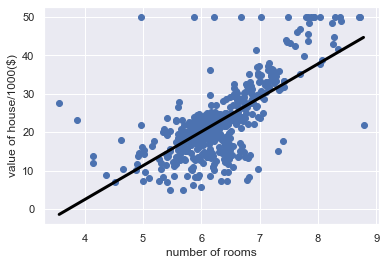

In [56]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms,Y_price)
plt.plot(prediction_space, linear_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

# Regression Model for All the variables

In [59]:


X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

linear_all = LinearRegression()
linear_all.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = linear_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(linear_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75


In [60]:

# model evaluation for test set

y_pred = linear_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(linear_all.score(X_test, y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.928602182665355
R^2: 0.67




# Finally the pridiction

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

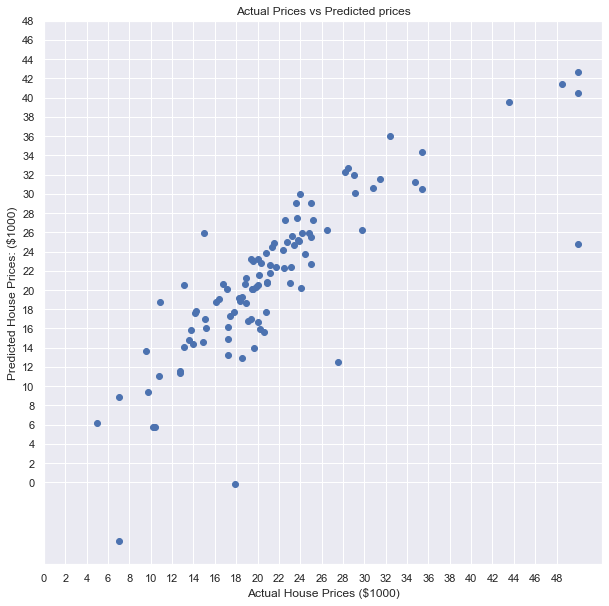

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(y_test)),2))
plt.yticks(range(0, int(max(y_test)),2))
plt.title("Actual Prices vs Predicted prices")

we can see how our model is predicting by plotting a scatter plot between the original house price and predicted house prices.

